<a href="https://colab.research.google.com/github/antonellafontanetto/Energ-a-Nuclear/blob/main/Energ%C3%ADa_NuclearV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energía Nuclear


El archivo World_Nuclear_Power_Reactors.csv es un dataset que suele recopilar información sobre reactores nucleares en el mundo: nombre, país, año de conexión, capacidad, estado, etc.

Este conjunto de datos proporciona estadísticas completas sobre los recursos mundiales de generación de energía nuclear. Ofrece información detallada sobre las centrales nucleares operativas a nivel mundial. Incluye información sobre ubicación, país, nombre del reactor, tipo, fecha de puesta en servicio, estado y producción de electricidad por unidad.

In [1]:
import pandas as pd

# Leer con codificación alternativa si falla 'utf-8'
df = pd.read_csv("World_Nuclear_Power_Reactors.csv", encoding='ISO-8859-1')

# Ver columnas disponibles y las primeras filas
print(df.columns)
print(df.head())


Index(['Location', 'Reactor Name', 'Model', 'Reactor Type',
       'Net Capacity (MWe)', 'Construction Start', 'First Grid Connection',
       'Status', 'Country', 'Unnamed: 9'],
      dtype='object')
  Location Reactor Name            Model Reactor Type Net Capacity (MWe)  \
0      NaN     Atucha 1         PHWR KWU         PHWR                340   
1      NaN      Embalse          CANDU 6         PHWR                608   
2      NaN     Atucha 2         PHWR KWU         PHWR                693   
3      NaN   Armenian 2       VVER V-270          PWR                416   
4      NaN    Rooppur 1  VVER-1200/V-523          PWR           1200 MWe   

  Construction Start First Grid Connection              Status     Country  \
0            1968-06               1974-03             Working   Argentina   
1            1974-04               1983-04             Working   Argentina   
2            1981-07               2014-06             Working   Argentina   
3            1975-07          

In [22]:
df.head(15)

,Location,Reactor Name,Model,Reactor Type,Net Capacity (MWe),Construction Start,First Grid Connection,Status,Country,Unnamed: 9
0,NaN,Atucha 1,PHWR KWU,PHWR,340,1968-06,1974-03,Working,Argentina,NaN
1,NaN,Embalse,CANDU 6,PHWR,608,1974-04,1983-04,Working,Argentina,NaN
2,NaN,Atucha 2,PHWR KWU,PHWR,693,1981-07,2014-06,Working,Argentina,NaN
3,NaN,Armenian 2,VVER V-270,PWR,416,1975-07,1980-01,Working,Armenia,NaN
4,NaN,Rooppur 1,VVER-1200/V-523,PWR,1200 MWe,Nov-17,2024,Under Construction,Bangladesh,NaN
5,NaN,Rooppur 2,VVER-1200/V-523,PWR,1200 MWe,Jul-18,2024 or 2025,Under Construction,Bangladesh,NaN
6,NaN,Ostrovets 2,VVER V-491,PWR,1110,2014-04,2023-05,Working,Balarus,NaN
7,NaN,Ostrovets 1,VVER V-491,PWR,1110,2013-11,2020-11,Working,Balarus,NaN
8,NaN,Doel 1,NaN,PWR,445 MWe,1974,Feb-25,Working,Baljium,NaN
9,NaN,Doel 2,NaN,PWR,445 MWe,1975,Dec-25,Working,Baljium,NaN


In [23]:
df.shape

(607, 10)

In [5]:
df.columns

Index(['Location', 'Reactor Name', 'Model', 'Reactor Type',
       'Net Capacity (MWe)', 'Construction Start', 'First Grid Connection',
       'Status', 'Country', 'Unnamed: 9'],
      dtype='object')

In [39]:
print(df.isna().sum())

Location                 422
Reactor Name               6
Model                    160
Reactor Type              16
Net Capacity (MWe)         2
Construction Start       232
First Grid Connection    151
Status                     1
Country                    1
Unnamed: 9               607
Year                     423
dtype: int64


In [40]:
total = df.shape[0]  # cantidad de filas
missing = df.isna().sum()
percent = (missing / total * 100).round(2)

# Unir ambos resultados
missing_data = pd.DataFrame({'Nulos': missing, 'Porcentaje (%)': percent})
print(missing_data)


                       Nulos  Porcentaje (%)
Location                 422           69.52
Reactor Name               6            0.99
Model                    160           26.36
Reactor Type              16            2.64
Net Capacity (MWe)         2            0.33
Construction Start       232           38.22
First Grid Connection    151           24.88
Status                     1            0.16
Country                    1            0.16
Unnamed: 9               607          100.00
Year                     423           69.69


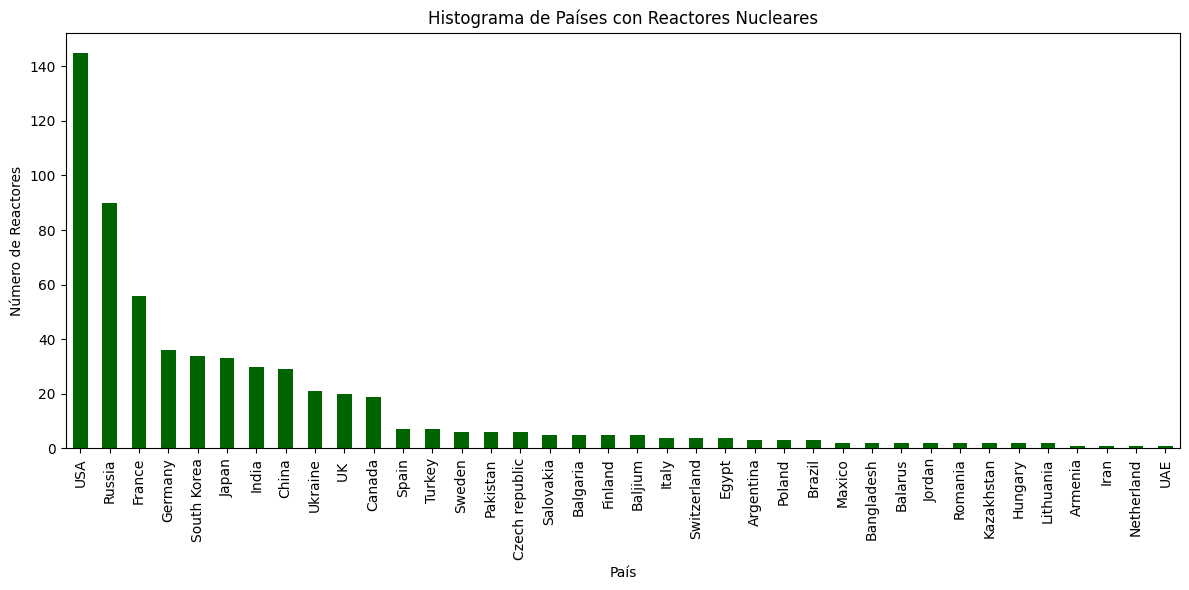

In [28]:
# Histograma de los países

import matplotlib.pyplot as plt

# Crear un histograma de la columna 'Country'
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar', color='darkgreen')
plt.title('Histograma de Países con Reactores Nucleares')
plt.xlabel('País')
plt.ylabel('Número de Reactores')
plt.xticks(rotation=90) # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar diseño para evitar solapamiento
plt.show()

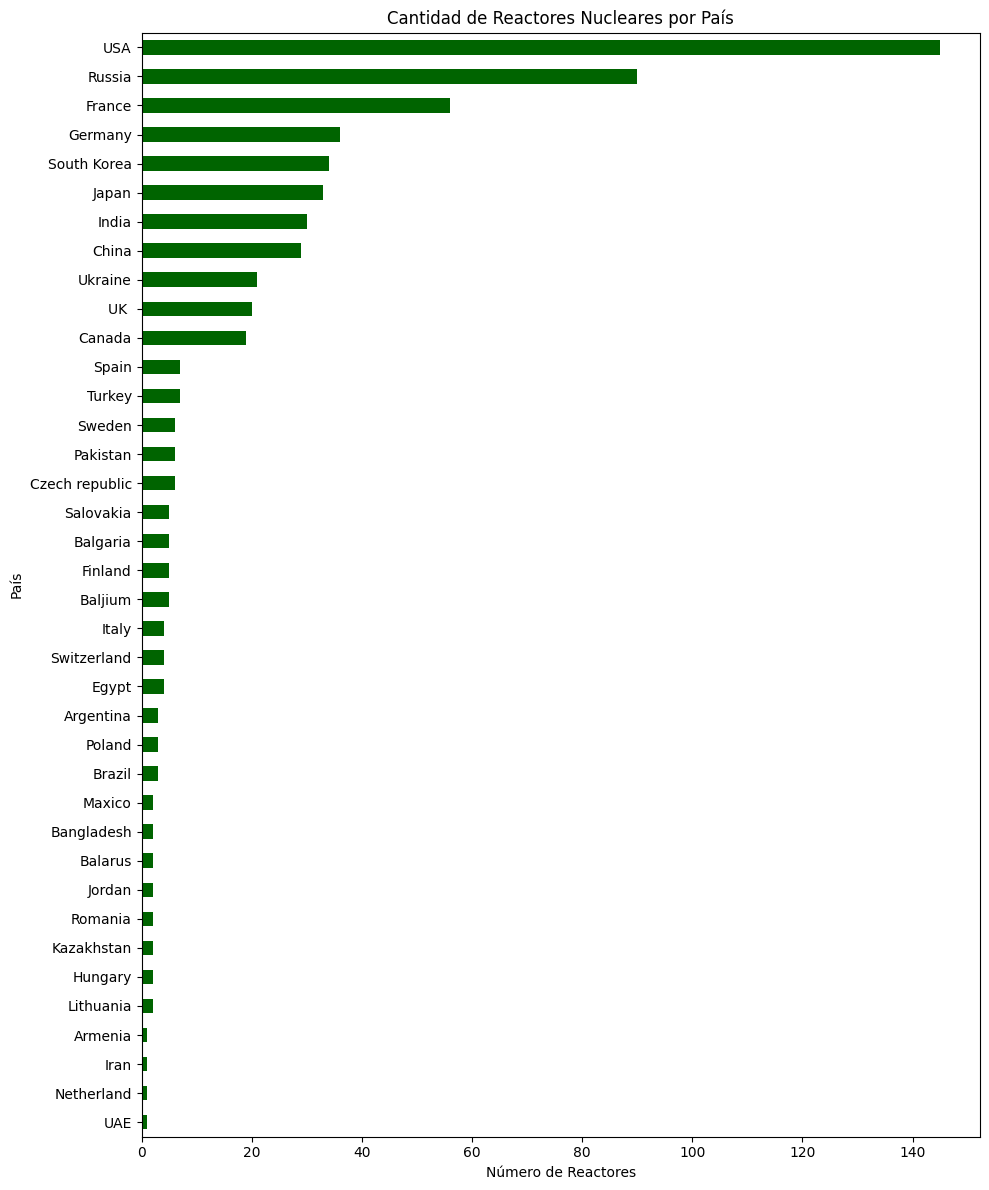

In [27]:
import matplotlib.pyplot as plt

# Contar reactores por país y ordenar de mayor a menor, luego invertir para que el más grande esté arriba
country_counts = df['Country'].value_counts().iloc[::-1]

plt.figure(figsize=(10, 12))
country_counts.plot(kind='barh', color='darkgreen')

plt.title('Cantidad de Reactores Nucleares por País')
plt.xlabel('Número de Reactores')
plt.ylabel('País')
plt.tight_layout()
plt.show()


/tmp/ipython-input-29-729289885.py:15: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


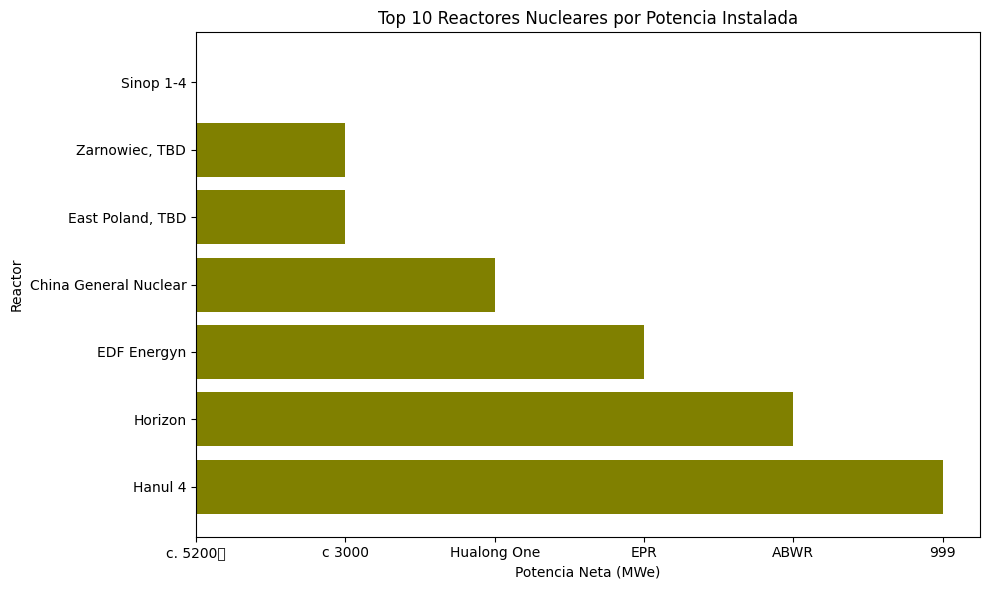

In [29]:
import matplotlib.pyplot as plt

# Asegúrate de que las columnas existen
# Filtramos y ordenamos
top10_reactores = df[['Reactor Name', 'Net Capacity (MWe)']].dropna()
top10_reactores = top10_reactores.sort_values(by='Net Capacity (MWe)', ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(top10_reactores['Reactor Name'], top10_reactores['Net Capacity (MWe)'], color='olive')
plt.title('Top 10 Reactores Nucleares por Potencia Instalada')
plt.xlabel('Potencia Neta (MWe)')
plt.ylabel('Reactor')
plt.gca().invert_yaxis()  # Para que el más potente quede arriba
plt.tight_layout()
plt.show()


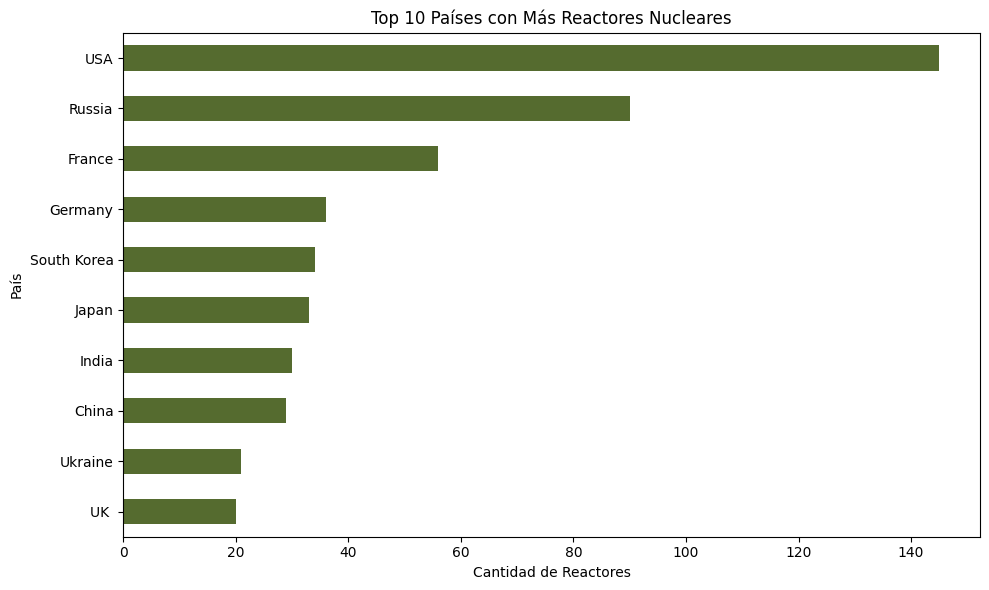

In [30]:
import matplotlib.pyplot as plt

# Contar cuántos reactores tiene cada país
top10_paises = df['Country'].value_counts().head(10)

# Graficar
plt.figure(figsize=(10, 6))
top10_paises.plot(kind='barh', color='darkolivegreen')
plt.title('Top 10 Países con Más Reactores Nucleares')
plt.xlabel('Cantidad de Reactores')
plt.ylabel('País')
plt.gca().invert_yaxis()  # Para que el país con más reactores esté arriba
plt.tight_layout()
plt.show()


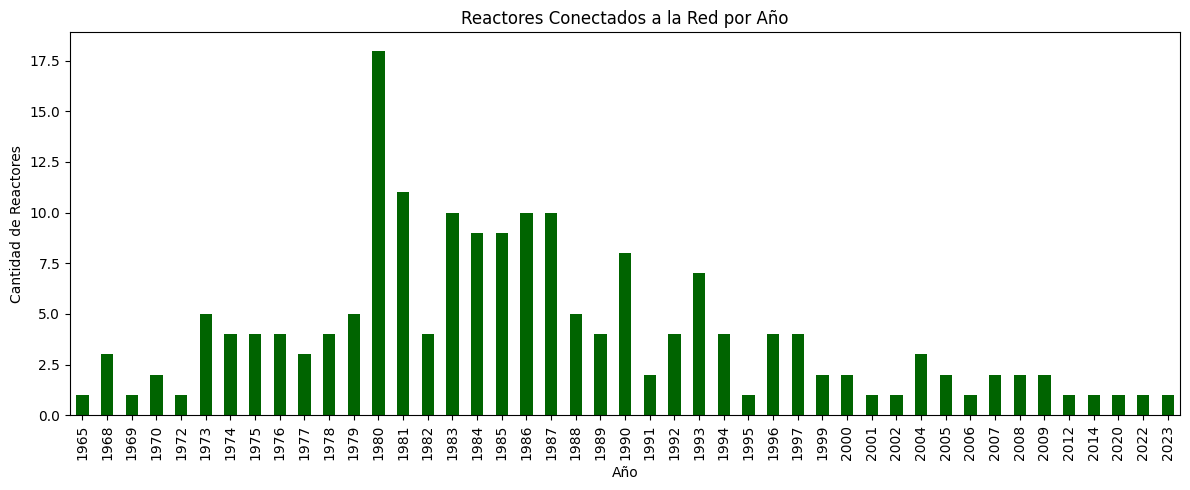

In [34]:
df['Year'] = pd.to_datetime(df['First Grid Connection'], errors='coerce').dt.year

# Agrupar por año y asegurarse de que el índice sea int
year_counts = df.groupby('Year').size()
year_counts.index = year_counts.index.astype('Int64')  # o int si no hay NaNs

# Graficar
year_counts.plot(kind='bar', figsize=(12, 5), color='darkgreen')
plt.title('Reactores Conectados a la Red por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reactores')
plt.tight_layout()
plt.show()


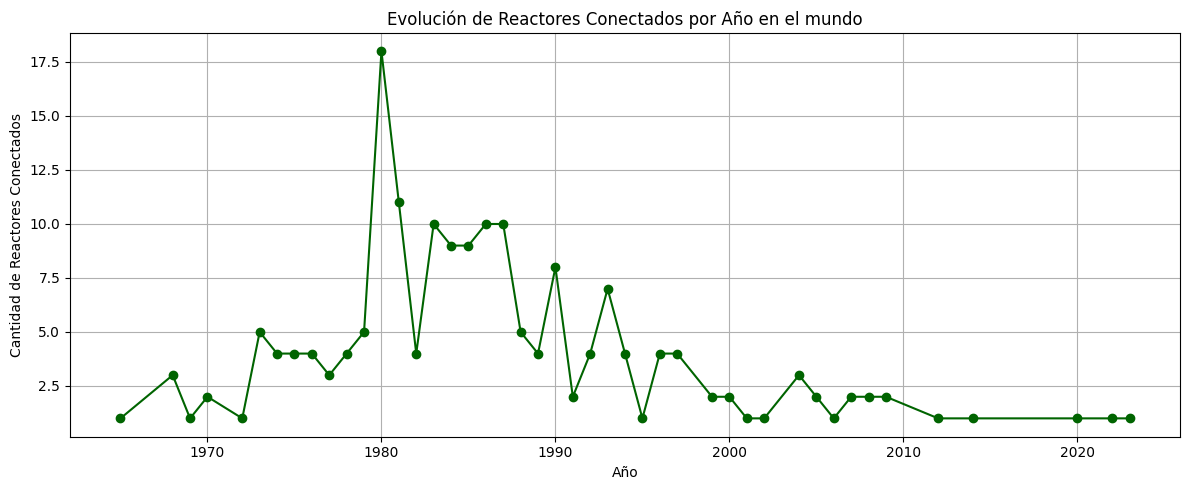

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir a año
df['Year'] = pd.to_datetime(df['First Grid Connection'], errors='coerce').dt.year

# Agrupar y asegurarse de que el índice es int
year_counts = df.groupby('Year').size()
year_counts.index = year_counts.index.astype('Int64')  # o .astype(int) si no hay NaNs

# Gráfico de líneas
plt.figure(figsize=(12, 5))
plt.plot(year_counts.index, year_counts.values, marker='o', color='darkgreen', linestyle='-')
plt.title('Evolución de Reactores Conectados por Año en el mundo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reactores Conectados')
plt.grid(True)
plt.tight_layout()
plt.show()


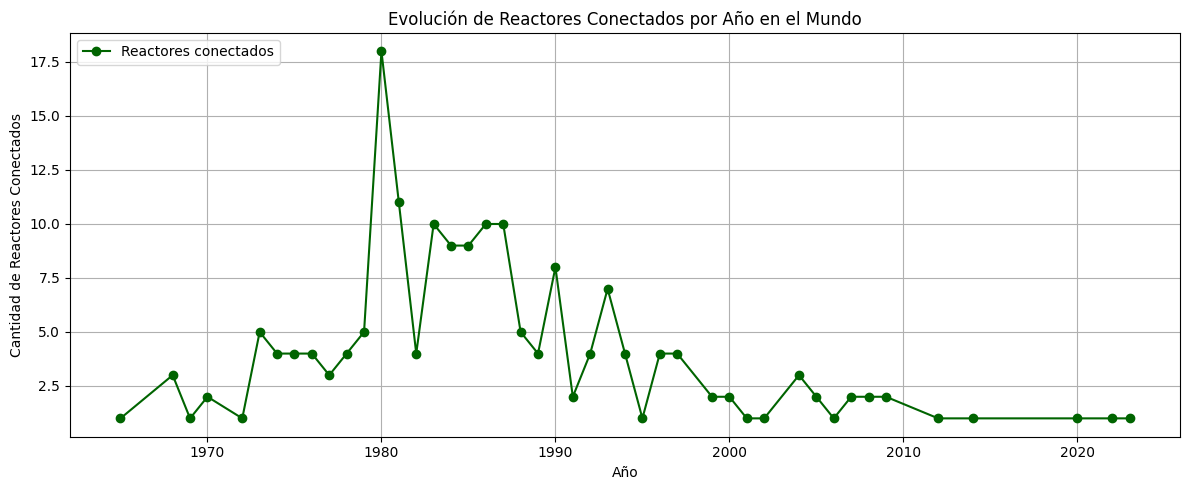

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir a año
df['Year'] = pd.to_datetime(df['First Grid Connection'], errors='coerce').dt.year

# Agrupar y asegurarse de que el índice es int
year_counts = df.groupby('Year').size()
year_counts.index = year_counts.index.astype('Int64')  # o .astype(int) si no hay NaNs

# Gráfico de líneas con leyenda
plt.figure(figsize=(12, 5))
plt.plot(year_counts.index, year_counts.values, marker='o', color='darkgreen', linestyle='-', label='Reactores conectados')
plt.title('Evolución de Reactores Conectados por Año en el Mundo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reactores Conectados')
plt.grid(True)
plt.legend(loc='upper left')  # Posición de la leyenda
plt.tight_layout()
plt.show()


# Centrales Nucleares de Potencia

# Atucha I

La Central Nuclear Atucha I aporta energía a la Argentina desde 1974 y es la primera central nuclear de América Latina. Está situada a 100 km de la Ciudad Autónoma de Buenos Aires, en la localidad de Lima, partido de Zárate. Actualmente cuenta con una potencia eléctrica bruta de 362 MW y emplea como combustible mezcla de uranio natural (0,72%) y uranio levemente enriquecido al 0,85%.

La Central es refrigerada y moderada con agua pesada (D20), y pertenece al tipo de reactores PHWR - reactor presurizado de agua pesada -.

El núcleo del reactor está compuesto por 252 posiciones con canales refrigerantes. Dentro de cada uno de ellos, se alojan los elementos combustibles en forma de pastillas de dióxido de uranio (UO2) sinterizadas.

La Central Nuclear Atucha I ha permitido un importante ahorro de recursos naturales con menor impacto ambiental, evitando la destrucción de la capa de ozono, el calentamiento de la atmósfera y la lluvia ácida.

# Atucha II

La Central Nuclear Atucha II es una central nucleoeléctrica con una potencia bruta de 745 MW, a base de uranio natural y agua pesada. Está situada en el mismo complejo que la Central Nuclear Atucha I.

La piedra fundamental de la Central Nuclear Atucha II se colocó en 1982 y, entre 1994 y 2006 estuvo paralizada, hasta el relanzamiento del Plan Nuclear Argentino, impulsado por el Estado Nacional ese mismo año.

El reinicio de la obra representó la recuperación de técnicos y profesionales especializados, recobrando las capacidades nacionales para el diseño y la construcción de centrales nucleares de potencia en la Argentina.

Desde el punto de vista del diseño y construcción, es una Central moderna que cuenta con sistemas de seguridad actualizados; con el concepto de defensa en profundidad con barreras sucesivas; esfera de contención; separación física entre sistemas de seguridad, y un programa de vigilancia en servicio.

# Embalse (Córdoba)

La Central Nuclear Embalse es, en orden cronológico, la segunda en construirse de nuestro país. Se encuentra situada en la costa sur del Embalse del Río Tercero, provincia de Córdoba, a 665 mts. sobre el nivel del mar. La Central se encuentra a 110 km al sudoeste de la Ciudad de Córdoba y a 700 km de la Ciudad de Buenos Aires.

La Central Nuclear Embalse es de tipo CANDU (Canadian Uranium Deuterium), pertenece al tipo de centrales de tubos de presión, que utiliza como combustible el uranio natural y su refrigerante y moderador es el agua pesada.

La carga y descarga del combustible se realiza durante la operación de la Central y los valores de potencia nominal son:

600 Mw – Potencia eléctrica Neta
648 Mw – Potencia eléctrica Bruta
La energía aportada por la Central Nuclear Embalse se entrega a la red nacional, es decir, al Sistema Argentino de Interconexión (SADI).

En promedio, a valores actuales de consumo per cápita, la Central suministra la energía suficiente para cumplir con los requerimientos de 3 a 4 millones de personas. La energía generada llega al Noroeste Argentino, Cuyo, Centro, Gran Buenos Aires y el Litoral. En 2007, como parte del Plan Nuclear Argentino, comenzaron los trabajos para la Extensión de Vida de Embalse.

En estos momentos, la Central Embalse se encuentra en un proceso de extensión de vida para prolongar su vida útil otros 30 años. Ésta volverá a ponerse en funcionamiento en el 2019.

In [3]:
# Filtrar plantas nucleares ubicadas en Argentina
df_argentina = df[df['Country'].str.contains("Argentina", na=False)]

# Mostrar resultados
print(df_argentina)



  Location Reactor Name     Model Reactor Type Net Capacity (MWe)  \
0      NaN     Atucha 1  PHWR KWU         PHWR                340   
1      NaN      Embalse   CANDU 6         PHWR                608   
2      NaN     Atucha 2  PHWR KWU         PHWR                693   

  Construction Start First Grid Connection   Status    Country  Unnamed: 9  
0            1968-06               1974-03  Working  Argentina         NaN  
1            1974-04               1983-04  Working  Argentina         NaN  
2            1981-07               2014-06  Working  Argentina         NaN  


### Evolución de potencia instalada en el tiempo

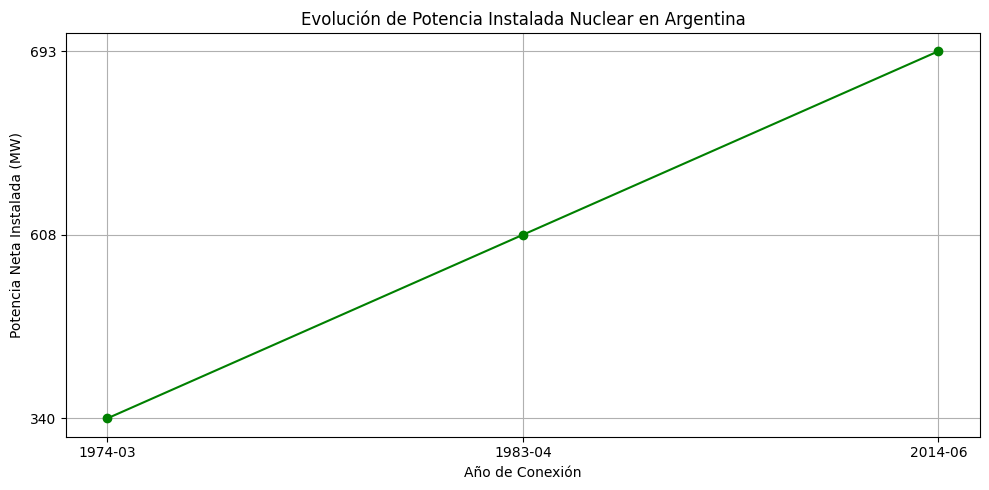

In [7]:
import matplotlib.pyplot as plt

# Asegurate de que estas columnas existan en tu dataset:
# 'Country', 'Net Capacity (MW)', 'Grid Connection Year'

# Filtrar Argentina y limpiar
df_arg = df[df['Country'].str.contains("Argentina", na=False)]
df_arg = df_arg[['Reactor Name', 'First Grid Connection', 'Net Capacity (MWe)']].dropna()

# Agrupar por año de conexión
df_grouped = df_arg.groupby('First Grid Connection')['Net Capacity (MWe)'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['First Grid Connection'], df_grouped['Net Capacity (MWe)'], marker='o', color='green')
plt.title('Evolución de Potencia Instalada Nuclear en Argentina')
plt.xlabel('Año de Conexión')
plt.ylabel('Potencia Neta Instalada (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()



### Distribución de potencia por reactor

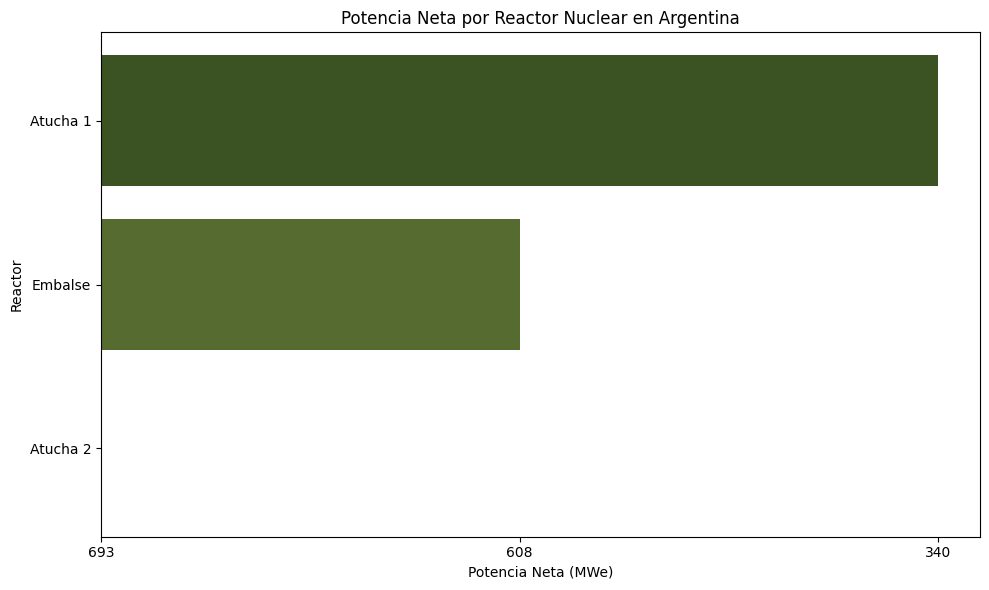

In [15]:
import matplotlib.pyplot as plt

# Ordenar datos
df_sorted = df_arg.sort_values(by='Net Capacity (MWe)', ascending=False)

plt.figure(figsize=(10, 6))

# Lista de verdes militares oscuros para las barras (ajustá la cantidad si hay más reactores)
military_greens = [
    "#4B5320",  # Verde militar oscuro
    "#556B2F",  # Verde oliva oscuro
    "#3B5323",  # Verde bosque oscuro
    "#36454F",  # Azul grisáceo oscuro (para variar un poco pero sigue sobrio)
    "#2F4F4F",  # Verde oscuro grisáceo
]

# Si hay más reactores que colores, repetimos la lista (o usá menos reactores)
colors = military_greens * (len(df_sorted) // len(military_greens) + 1)
colors = colors[:len(df_sorted)]

# Graficar barras con colores militares
plt.barh(df_sorted['Reactor Name'], df_sorted['Net Capacity (MWe)'], color=colors)

plt.title('Potencia Neta por Reactor Nuclear en Argentina')
plt.xlabel('Potencia Neta (MWe)')
plt.ylabel('Reactor')

plt.tight_layout()
plt.show()


###  Estado de los reactores

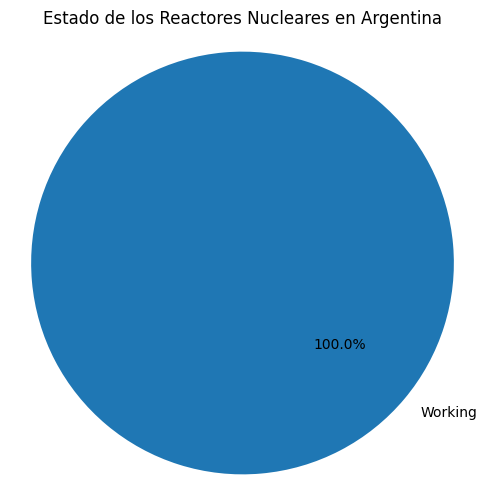

In [21]:
# Contar cantidad de reactores por estado (Operating, Shut down, Under Construction, etc.)
estado_counts = df_argentina['Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(estado_counts, labels=estado_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Estado de los Reactores Nucleares en Argentina')
plt.axis('equal')
plt.show()
